In [17]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
import cvxpy as cp


import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sb
import numpy as np
from scs import SCS

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


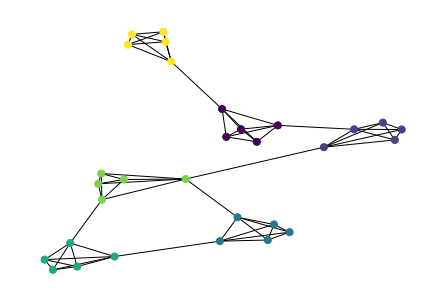

In [11]:
list_shapes = ['nx.complete_graph'] * 6
list_shapes_args = [[5]] * 6
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [6, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=50, std=1.5, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()
L = np.float32(nx.laplacian_matrix(G).todense())
Gamma = np.float32(nx.incidence_matrix(G).todense().T) # E * N
for i in range(Gamma.shape[0]):
    for j in range(Gamma.shape[1]):
        if Gamma[i,j] !=0:
            Gamma[i,j] = - Gamma[i,j]
            break

In [28]:
def elast_cp_solver0(X, Gamma, l1, l2, maxiter):
    n = X.shape[0]
    W = cp.Variable((n,n))
    prob = cp.Problem(cp.Minimize( recon_loss(X, W) + ee_penalty(Gamma, W, l1, l2) ))
    prob.solve(max_iters=maxiter, solver='SCS')
    return W.value

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


<AxesSubplot:>

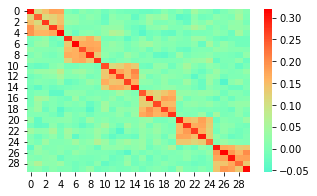

In [29]:
# the optimal W when there is no constraint
l1s = np.float32([100])
l2s = np.float32([1000])
num1 = len(l1s)
num2 = len(l2s)

f = plt.figure(figsize=(5,3))

i = j = 0
ax0 = f.add_subplot()
W = elast_cp_solver0(X=node_features, Gamma=Gamma, l1=l1s[i], l2=l2s[j], maxiter=50)
sb.heatmap(W, cmap='rainbow', center=0)

In [30]:
np.linalg.cond(node_features)

10.39699

In [31]:
def elast_cp_solver1(X, Gamma, l1, l2, maxiter):
    n = X.shape[0]
    W = cp.Variable((n,n))
    prob = cp.Problem(cp.Minimize( recon_loss(X, W) + ee_penalty(Gamma, W, l1, l2) ))
    prob.solve(max_iters=maxiter)
    return W.value

SolverError: Solver 'ECOS' failed. Try another solver, or solve with verbose=True for more information.

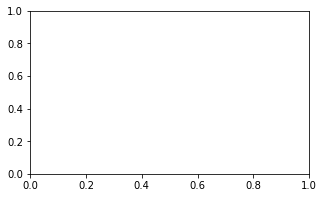

In [32]:
# the optimal W when there is no constraint
l1s = np.float32([100])
l2s = np.float32([1000])
num1 = len(l1s)
num2 = len(l2s)

f = plt.figure(figsize=(5,3))

i = j = 0
ax0 = f.add_subplot()
W = elast_cp_solver1(X=node_features, Gamma=Gamma, l1=l1s[i], l2=l2s[j], maxiter=50)
sb.heatmap(W, cmap='rainbow', center=0)